In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt


In [22]:
a = [[1, 3],
     [0, 1]]
b = [[4, 1],
     [2, 1]]

In [23]:
np.dot(a,b)

array([[10,  4],
       [ 2,  1]])

In [32]:
X=np.dot(np.random.rand(2,2),np.random.randn(2,200)).T

In [368]:
X.shape

(200, 2)

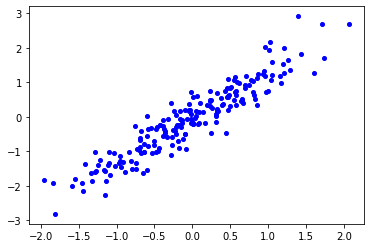

In [39]:
plt.plot(X[:,0], X[:,1],'ob', markersize=4)

In [40]:
from sklearn.decomposition import PCA

In [370]:
model = PCA(n_components=2)
model.fit(X)

PCA(n_components=2)

In [372]:
model.components_

array([[ 0.59111037,  0.80659068],
       [ 0.80659068, -0.59111037]])

In [63]:
model.mean_

array([-0.04253207, -0.0781343 ])

In [64]:
model.explained_variance_

array([1.63557921, 0.04813675])

In [65]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca() 
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

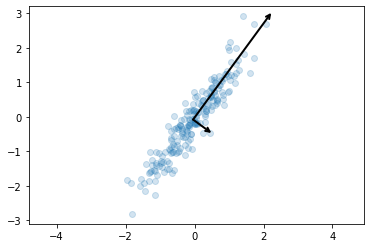

In [72]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(model.explained_variance_, model.components_):
    v = vector * 3 * np.sqrt(length) 
    draw_vector(model.mean_, model.mean_+v) 
    plt.axis('equal')

In [76]:
model.mean_

array([-0.04253207, -0.0781343 ])

In [74]:
model.mean_+ v

array([ 0.48836805, -0.4672047 ])

In [116]:
model = PCA(n_components=1)
X_new = model.fit_transform(X)

In [117]:
X.shape

(200, 2)

In [118]:
X_new.shape

(200, 1)

In [120]:
X_new2 = model.inverse_transform(X_new)

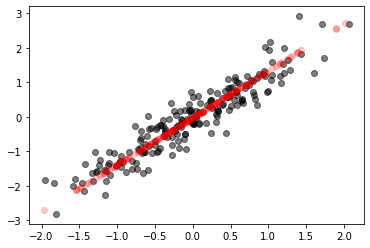

In [121]:
plt.plot(X[:,0], X[:,1], 'ok', alpha=0.5)
plt.plot(X_new2[:,0], X_new2[:,1], 'or', alpha=0.2)

In [133]:
from sklearn.datasets import load_digits

In [136]:
digits = load_digits()

In [137]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [140]:
model3= PCA(2)
new_data = model3.fit_transform(digits.data)

In [161]:
new_data.shape

(1797, 2)

Text(0, 0.5, 'componnet 2')

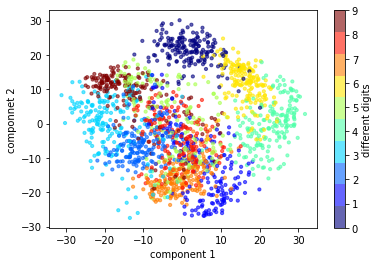

In [169]:
plt.scatter(new_data[:,0], new_data[:,1],c= digits.target, s=10, cmap = plt.cm.get_cmap('jet', 10), alpha=0.6 )
plt.colorbar(label='different digits')
plt.xlabel('component 1')
plt.ylabel('componnet 2')

Text(0, 0.5, 'cumulative explained variance')

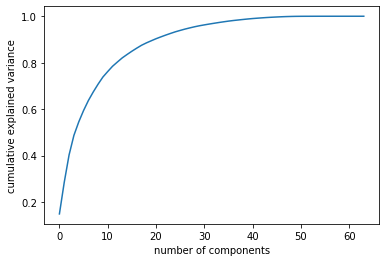

In [170]:
pca = PCA().fit(digits.data)

plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance')

In [171]:
np.random.normal([1,2,3,4,5,6], 4)

array([0.44986931, 4.51295693, 2.2159642 , 7.73078682, 6.697143  ,
       5.91380848])

In [ ]:
ax.spines_set

In [195]:
def plot_data(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8), cmap='binary', interpolation='nearest',clim=(0, 16))
        for i in ax.spines.values():
            i.set_visible(False)

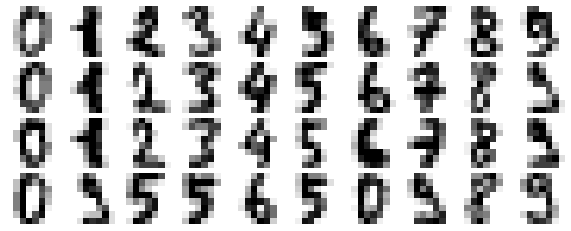

In [196]:
plot_data(digits.data)

In [248]:
noisy = np.random.normal(digits.data,4)

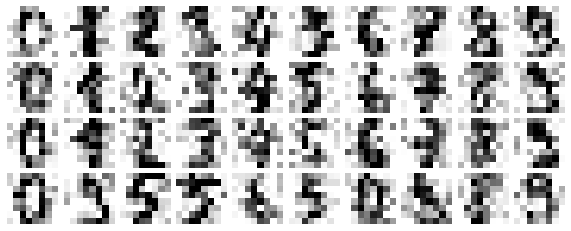

In [249]:
plot_data(noisy)

In [376]:
digits.data.shape

(1797, 64)

In [362]:
Model1 = PCA(0.50)

In [363]:
bb = Model1.fit(noisy)

In [364]:
bb.components_.shape

(12, 64)

In [365]:
new = Model1.fit_transform(noisy)

In [366]:
pcav= Model1.inverse_transform(new)

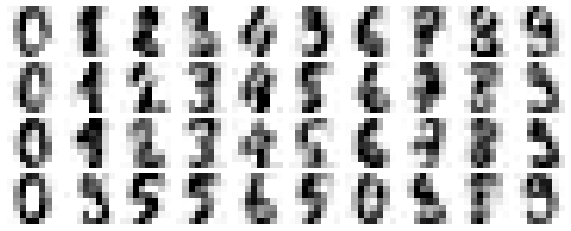

In [367]:
plot_data(pcav)

In [360]:
digits.data.shape

(1797, 64)

In [361]:
noisy.shape

(1797, 64)

In [275]:
pcav.shape

(1797, 64)

In [276]:
new.shape

(1797, 12)

In [277]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60) 
print(faces.target_names) 
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [293]:
faces.data.shape

(1348, 2914)

In [295]:
faces.images.shape

(1348, 62, 47)

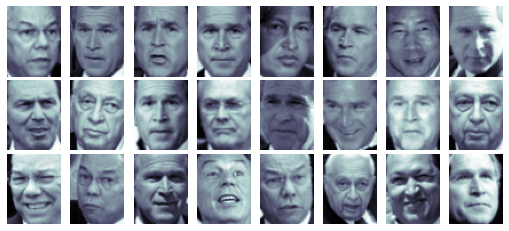

In [297]:
fig, axes = plt.subplots(3,8, figsize=(9,4), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.05, wspace=0.05))
for i , ax in enumerate(axes.flat):
    ax.imshow(faces.data[i].reshape(62,47), cmap='bone')
    for j in ax.spines.values():
        j.set_visible(False)

In [287]:
from sklearn.decomposition import PCA as RandomizedPCA

In [323]:
modelA = RandomizedPCA(150)

In [324]:
new = modelA.fit(faces.data) # dont have to transform the data

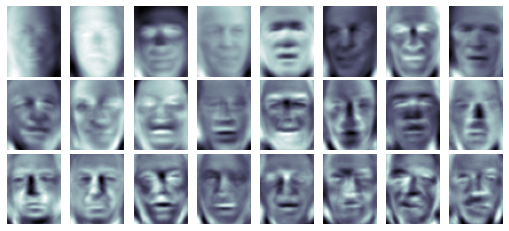

In [325]:
fig = plt.figure(figsize=(9,4))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i in range(1, 25):
    ax = fig.add_subplot(3, 8, i)
    ax.imshow(new.components_[i].reshape(62,47), cmap='bone')
    ax.set(xticks=[], yticks=[])
    for j in ax.spines.values():
        j.set_visible(False)

In [380]:
faces.data.shape

(1348, 2914)

In [378]:
aa = modelA.fit(faces.data)
aa.components_.shape

(150, 2914)

In [326]:
new2 = modelA.fit_transform(faces.data)

In [373]:
new2.shape

(1348, 150)

In [327]:
new3 = modelA.inverse_transform(new2)

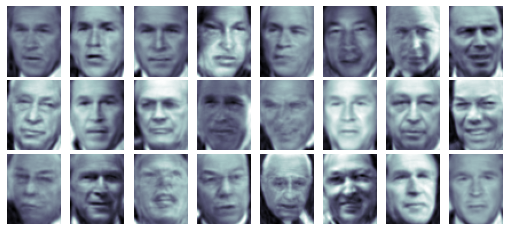

In [329]:
fig = plt.figure(figsize=(9,4))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i in range(1, 25):
    ax = fig.add_subplot(3, 8, i)
    ax.imshow(new3[i].reshape(62,47), cmap='bone')
    ax.set(xticks=[], yticks=[])
    for j in ax.spines.values():
        j.set_visible(False)

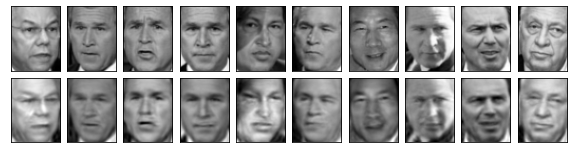

In [330]:
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10): 
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(new3[i].reshape(62, 47), cmap='binary_r')

In [396]:
noisy_faces = np.random.normal(faces.data, 30)

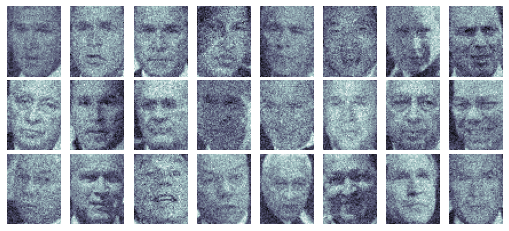

In [420]:
fig = plt.figure(figsize=(9,4))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i in range(1, 25):
    ax = fig.add_subplot(3, 8, i)
    ax.imshow(noisy_faces[i].reshape(62,47), cmap='bone')
    ax.set(xticks=[], yticks=[])
    for j in ax.spines.values():
        j.set_visible(False)

In [398]:
from sklearn.decomposition import PCA as RandomizedPCA

In [412]:
modelB = RandomizedPCA(0.60)

In [416]:
modelB_new = modelB.fit(noisy_faces)

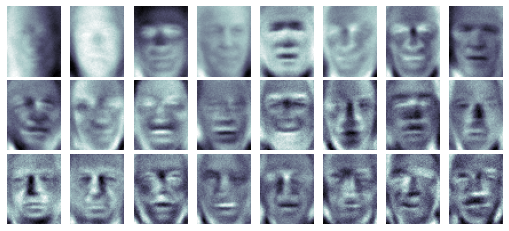

In [418]:
fig = plt.figure(figsize=(9,4))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i in range(1, 25):
    ax = fig.add_subplot(3, 8, i)
    ax.imshow(modelB_new.components_[i].reshape(62,47), cmap='bone')
    ax.set(xticks=[], yticks=[])
    for j in ax.spines.values():
        j.set_visible(False)

In [413]:
fitted = modelB.fit_transform(noisy_faces)

In [414]:
inverse = modelB.inverse_transform(fitted)

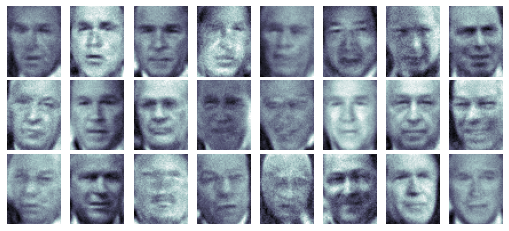

In [415]:
fig = plt.figure(figsize=(9,4))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i in range(1, 25):
    ax = fig.add_subplot(3, 8, i)
    ax.imshow(inverse[i].reshape(62,47), cmap='bone')
    ax.set(xticks=[], yticks=[])
    for j in ax.spines.values():
        j.set_visible(False)